# Mini Project: Titanic Dataset

## Table of Contents
* Load Dataset
* Check Data Types
* Check Correlation
* Describe
* Missing Value Checks
* Age


In [112]:
import numpy as an
import pandas as pd
import seaborn as sns

## Load Dataset

In [113]:
df = sns.load_dataset('titanic')

In [114]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [115]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Check Data Types

In [116]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [117]:
{col: df[col].nunique() for col in df}

{'survived': 2,
 'pclass': 3,
 'sex': 2,
 'age': 88,
 'sibsp': 7,
 'parch': 7,
 'fare': 248,
 'embarked': 3,
 'class': 3,
 'who': 3,
 'adult_male': 2,
 'deck': 7,
 'embark_town': 3,
 'alive': 2,
 'alone': 2}

In [118]:
{col: df[col].nunique() for col in df if df[col].dtypes == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [119]:
df = df.astype(
    {
        'sex' : 'category',
        'embarked' : 'category',
        'who' : 'category',
        'alive' : 'category',
        'embark_town' : 'category',
    }
)

In [120]:
df.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive          category
alone              bool
dtype: object

In [121]:
df['alive']

0       no
1      yes
2      yes
3      yes
4       no
      ... 
886     no
887    yes
888     no
889    yes
890     no
Name: alive, Length: 891, dtype: category
Categories (2, object): ['no', 'yes']

In [122]:
df['alive'] = df['alive'].cat.codes

In [123]:
df['alive']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: alive, Length: 891, dtype: int8

In [124]:
df['sex'] = df['sex'].cat.codes

In [125]:
df.dtypes

survived          int64
pclass            int64
sex                int8
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive              int8
alone              bool
dtype: object

In [126]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True


## Check Correlation

In [127]:
df.corr(numeric_only=True )

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [128]:
df.corr(numeric_only=True ).style.background_gradient(cmap='Blues')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [129]:
df.corr(numeric_only=True )[['survived']].style.background_gradient(cmap='Reds')

,survived
survived,1.000000
pclass,-0.338481
sex,-0.543351
age,-0.077221
sibsp,-0.035322
parch,0.081629
fare,0.257307
adult_male,-0.557080
alive,1.000000
alone,-0.203367


abs(df.corr(numeric_only=True)).style.highlight_min(axis=0)

In [130]:
df.drop(columns = 'alive', inplace= True)

In [131]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True


## Describe

In [132]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
df.describe(include = 'category')

,embarked,class,who,deck,embark_town
count,889,891,891,203,889
unique,3,3,3,7,3
top,S,Third,man,C,Southampton
freq,644,491,537,59,644


## Missing Values Check

In [134]:
df.isna().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [135]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [136]:
df.isna().sum()/df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alone           0.000000
dtype: float64

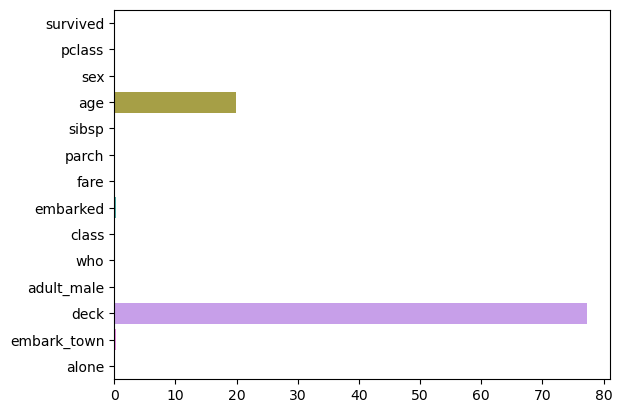

In [137]:
%matplotlib inline
ax = sns.barplot(
    x=df.isna().sum() / df.shape[0] * 100,
    y=df.columns
)

In [138]:
df = df.drop(columns = 'deck')

## Age

In [139]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [140]:
df.corr(numeric_only=True )[['age']].style.background_gradient(cmap='Reds')

,age
survived,-0.077221
pclass,-0.369226
sex,0.093254
age,1.000000
sibsp,-0.308247
parch,-0.189119
fare,0.096067
adult_male,0.280328
alone,0.198270


<Axes: xlabel='age', ylabel='Count'>

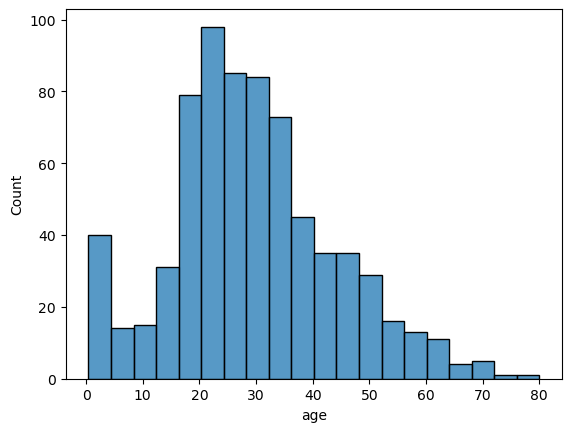

In [141]:
sns.histplot(df.age)

<Axes: xlabel='age', ylabel='Count'>

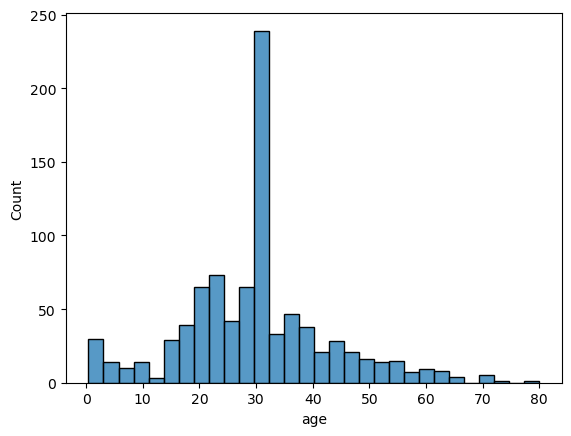

In [142]:
sns.histplot(df.age.fillna(df.age.mean()))

In [144]:
df.groupby(['adult_male', 'sex']).age.mean()

adult_male  sex
False       0      27.915709
            1       5.466750
True        1      33.173123
Name: age, dtype: float64

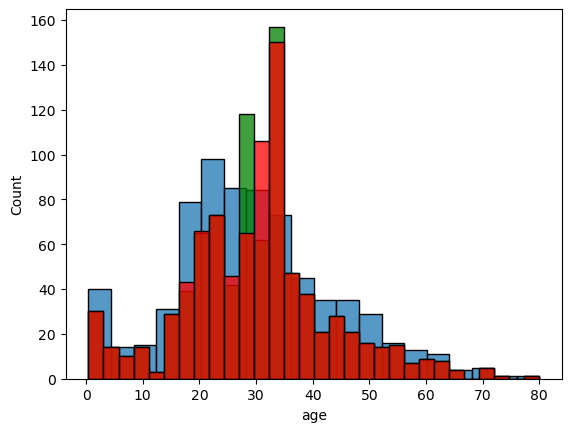

In [147]:
df['age_1'] = df['age'].fillna(df.groupby(['adult_male', 'sex'])['age'].transform('mean'))
df['age_2'] = df['age'].fillna(df.groupby(['adult_male', 'sex', 'sibsp', 'alone'])['age'].transform('mean'))
ax = sns.histplot(df.age)
ax = sns.histplot(df.age_1, ax=ax, color='g', label='age_1')
ax = sns.histplot(df.age_2, ax=ax, color='r', label='age_2')